# Airline Sentiment

Dataset from https://www.crowdflower.com/data-for-everyone/

Also on kaggle : https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [28]:
import pandas as pd

df = pd.read_csv('airline_sentiment.csv', index_col=0)

df['text'].fillna(' ', inplace=True)
df['airline_sentiment'] = df['airline_sentiment'] \
    .map({'negative': 'negative', 'neutral': 'neutral', 'netral': 'neutral', 'positive': 'positive', '1': 'positive'})

#df[['airline_sentiment', 'text']].head()
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,
681448150,FALSE,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.70306E+17,NaN,Eastern Time (US & Canada)
681448153,FALSE,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.70301E+17,NaN,Pacific Time (US & Canada)
681448156,FALSE,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.70301E+17,Lets Play,Central Time (US & Canada)
681448158,FALSE,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.70301E+17,NaN,Pacific Time (US & Canada)
681448159,FALSE,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.70301E+17,NaN,Pacific Time (US & Canada)


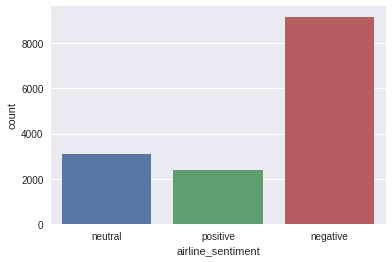

In [36]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='airline_sentiment', data=df)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.parsing.preprocessing import preprocess_string
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer(min_df=25, max_df=0.75, analyzer='word', tokenizer=preprocess_string, stop_words='english')
label_encoder = LabelEncoder()

X = vectorizer.fit_transform(df['text'].values)
y = label_encoder.fit_transform(df['airline_sentiment'].values)

In [30]:
print(X.shape)
print(y.shape)

(14640, 700)
(14640,)


In [39]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X, y, cv=ShuffleSplit(n_splits=5, test_size=0.2))
print("Score: {:.4f} (+/- {:.4f})".format(scores.mean(), scores.std()))

Score: 0.7690 (+/- 0.0044)
